In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [3]:
X_std = X/255

In [4]:
# code from lab 5
def sort_evals_descending(evals, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. This function
    also aligns the first two eigenvectors to be in first two quadrants if
    the data is 2D (remember that any eigenvector's direction can be inverted
    and it is still an eigenvector with the same eigenvalue). 
    """

    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

def pca(X):
    """
    Performs PCA on multivariate data.

    Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

    Returns:
    (numpy array of floats)   : Data projected onto the new basis
    (numpy array of floats)   : eigenvectors
    (numpy array of floats)   : corresponding eigenvalues

    """

    # Subtract the mean of X
    X_bar = X - np.mean(X, axis=0)
    # Calculate the sample covariance matrix
    cov_matrix = 1 / X.shape[0] * np.matmul(X_bar.T, X_bar)
    # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)
    # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)
    # Project the data onto the new eigenvector basis
    score = np.matmul(X, evectors)

    return score, evectors, evals

def reconstruct_data(score, evectors, X_mean, K):
    """
    Reconstruct the data based on the first K components.
    """
    assert(0<K<=784),"K must be between 1 and 784"

    X_reconstructed =  np.matmul(score[:, :K], evectors[:, :K].T) + X_mean
    
    return X_reconstructed

def plot_MNIST_sample(X):
    """
    Plots 9 images in the MNIST dataset.

    Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

    Returns:
    Nothing.

    """

    fig, ax = plt.subplots()
    k = 0
    for k1 in range(3):
        for k2 in range(3):
            k = k + 1
            plt.imshow(np.reshape(X[k, :], (28, 28)),
                     extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                     vmin=0, vmax=255)
    plt.xlim((3 * 28, 0))
    plt.ylim((3 * 28, 0))
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
    plt.clim([0, 250])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

def plot_eigenvalues(evals, limit=True):
    """
    Plots eigenvalues.
    """

    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.xlim([0, 100])  # limit x-axis up to 100 for zooming

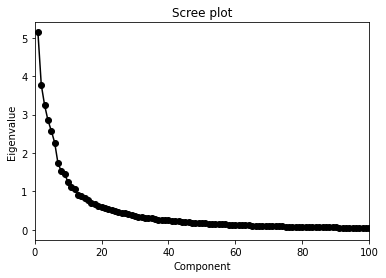

In [5]:
# perform PCA
score, evectors, evals = pca(X_std)

# plot the eigenvalues
plot_eigenvalues(evals, limit=True)

In [6]:
colors_d = {'0': 'red','1': 'blue','2':'green','3': 'orange','4': 'fuchsia','5':'pink','6':'brown','7':'dimgray','8':'aqua','9':'lime'}
colors = [colors_d[i] for i in y]

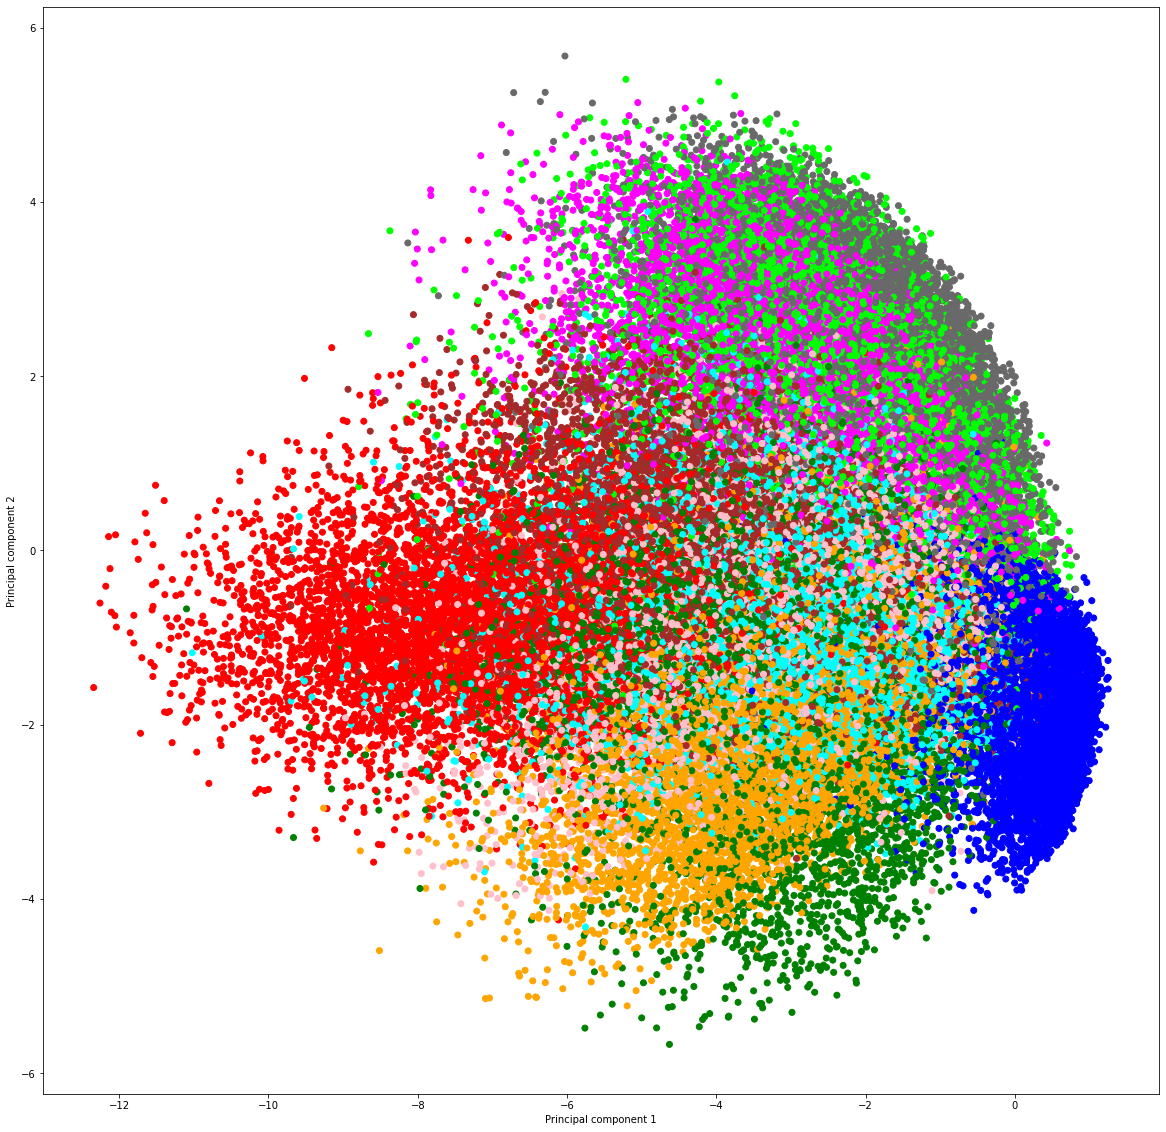

In [7]:
# perform PCA
score, evectors, evals = pca(X_std)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(score[:, 0], score[:, 1], c=colors)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.show()

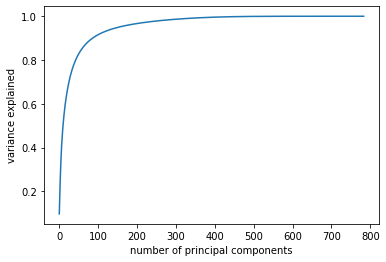

In [8]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of principal components")
plt.ylabel("variance explained")
plt.ylim(0, 1)
plt.axis('tight')
# saving the plot
plt.savefig('/home/pt18419/ML/test_plot.png', dpi=1000, bbox_inches='tight')
plt.show()

In [9]:
n_components = 87
pca = PCA(n_components=n_components).fit(X_std)
explained_variance = pca.explained_variance_ratio_.sum()
print('Using {} components, explained variance is {}'.format(n_components, explained_variance))

Using 87 components, explained variance is 0.9001503204083414


In [10]:
# code from https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/NMA2020/tutorials/W1D5_DimensionalityReduction/student/W1D5_Tutorial3.ipynb#scrollTo=IFaqaHPoGtuL
def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

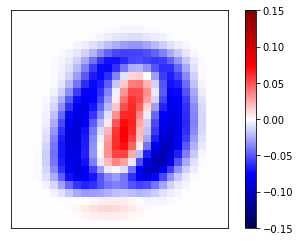

In [11]:
plot_MNIST_weights(evectors[:, 0])

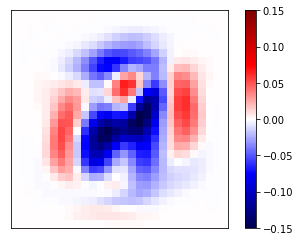

In [12]:
plot_MNIST_weights(evectors[:, 4])

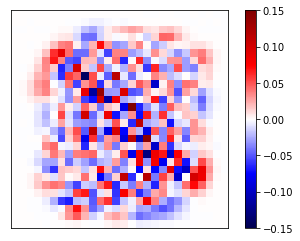

In [13]:
plot_MNIST_weights(evectors[:, 199])

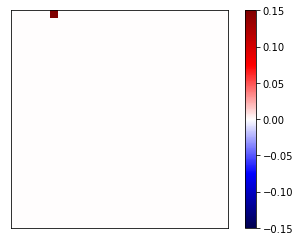

In [14]:
plot_MNIST_weights(evectors[:, 749])

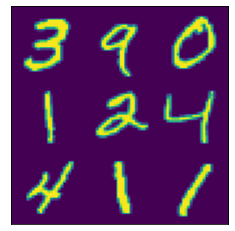

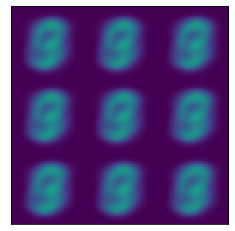

In [15]:
# code from lab5
K = 50
X_mean = np.mean(X, axis=0)
X_reconstructed = reconstruct_data(score, evectors, X_mean, K)

plot_MNIST_sample(X)
plot_MNIST_sample(X_reconstructed)